In [165]:
from collections import OrderedDict
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm

In [25]:
with open('seasons.pickle') as f:
    seasons = pickle.load(f)
for year, season in seasons.iteritems():
    print year,
    season.load_scores()

2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


In [14]:
men = []
ladies = []
pairs = []
dance = []
skaters = [men, ladies, pairs, dance]
for year in seasons:
    season = seasons[year]
    for event in season.events:
        for i, discipline in enumerate(event.disciplines):
            df = pd.read_csv(discipline.results_csv)
            skaters[i].append(df)
men = pd.concat(men)
ladies = pd.concat(ladies)
pairs = pd.concat(pairs)
dance = pd.concat(dance)

In [28]:
events = {}
for season in seasons.values():
    events.update(season.event_dict)

In [127]:
for discipline, df in skaters.iteritems():
    df.to_csv('pd_data/results_nowd_nofra15_' + discipline + '.csv')

In [128]:
skaters['men'].head()

,Date,Event,Free Rank,Free Score,Name,Nation,Points,Rank,Short Rank,Short Score,Num Short Scorecards,Num Free Scorecards,Short Start,Free Start,Season
0,2005-10-23,gpusa05,1,149.44,Daisuke TAKAHASHI,JPN,218.54,1,1,69.1,12,12,NaN,NaN,2006
1,2005-10-23,gpusa05,3,125.96,Evan LYSACEK,USA,193.71,2,3,67.75,12,12,NaN,NaN,2006
2,2005-10-23,gpusa05,2,127.4,Brian JOUBERT,FRA,190.28,3,4,62.88,12,12,NaN,NaN,2006
3,2005-10-23,gpusa05,4,116.3,Kevin VAN DER PERREN,BEL,185.09,4,2,68.79,12,12,NaN,NaN,2006
4,2005-10-23,gpusa05,6,98.58,Yannick PONSERO,FRA,160.53,5,5,61.95,12,12,NaN,NaN,2006


In [140]:
# only grab 2017 results where there are start orders
start_order = skaters['men'][skaters['men']['Short Start'].notnull()]
start_order17 = start_order[start_order.Season == 2017]
len(start_order17)

170

In [225]:
start_order17

,Date,Event,Free Rank,Free Score,Name,Nation,Points,Rank,Short Rank,Short Score,Num Short Scorecards,Num Free Scorecards,Short Start,Free Start,Season
0,2016-10-23,gpusa2016,1,190.19,Shoma UNO,JPN,279.34,1,1,89.15,10,10,9.0,9.0,2017
1,2016-10-23,gpusa2016,2,182.63,Jason BROWN,USA,268.38,2,3,85.75,10,10,8.0,10.0,2017
2,2016-10-23,gpusa2016,3,174.11,Adam RIPPON,USA,261.43,3,2,87.32,10,10,10.0,8.0,2017
3,2016-10-23,gpusa2016,5,166.6,Sergei VORONOV,RUS,245.28,4,5,78.68,10,10,4.0,7.0,2017
4,2016-10-23,gpusa2016,4,172.15,Boyang JIN,CHN,245.08,5,8,72.93,10,10,2.0,5.0,2017
5,2016-10-23,gpusa2016,7,159.64,Nam NGUYEN,CAN,239.26,6,4,79.62,10,10,5.0,6.0,2017
6,2016-10-23,gpusa2016,6,163.32,Maxim KOVTUN,RUS,230.75,7,10,67.43,10,10,6.0,1.0,2017
7,2016-10-23,gpusa2016,8,148.94,Timothy DOLENSKY,USA,226.53,8,6,77.59,10,10,3.0,3.0,2017
8,2016-10-23,gpusa2016,9,148.29,Jorik HENDRICKX,BEL,224.91,9,7,76.62,10,10,7.0,4.0,2017
9,2016-10-23,gpusa2016,10,140.14,Brendan KERRY,AUS,211.76,10,9,71.62,10,10,1.0,2.0,2017


In [191]:
history

,Date,Event,Free Rank,Free Score,Name,Nation,Points,Rank,Short Rank,Short Score,Num Short Scorecards,Num Free Scorecards,Short Start,Free Start,Season
31,2017-04-02,wc2017,DNQ,DNQ,Chih-I TSAO,TPE,61.52,32,32,61.52,36,24,3.0,NaN,2017
32,2017-04-02,wc2017,DNQ,DNQ,Valtter VIRTANEN,FIN,59.45,33,33,59.45,36,24,16.0,NaN,2017
33,2017-04-02,wc2017,DNQ,DNQ,Nicholas VRDOLJAK,CRO,57.28,34,34,57.28,36,24,2.0,NaN,2017
34,2017-04-02,wc2017,DNQ,DNQ,Slavik HAYRAPETYAN,ARM,57.14,35,35,57.14,36,24,17.0,NaN,2017
35,2017-04-02,wc2017,DNQ,DNQ,Larry LOUPOLOVER,AZE,38.97,36,36,38.97,36,24,1.0,NaN,2017


In [147]:
history = skaters['men'][skaters['men'].Season != 2017]
len(history)

1891

In [190]:
individual_bests_short = {skater: np.max(map(float, history[history.Name == skater]['Short Score']))
                          for skater in history.Name.get_values()}
len(individual_bests_short)

281

In [196]:
have_frees = history[history['Free Rank'] != 'DNQ']
have_frees = have_frees[have_frees['Free Rank'] != 'WD']
individual_bests_free = {skater: np.max(map(float, have_frees[have_frees.Name == skater]['Free Score']))
                         for skater in have_frees.Name.get_values()}
len(individual_bests_free)

224

In [197]:
med_short = np.median(individual_bests_short.values())
med_free = np.median(individual_bests_free.values())

In [216]:
start = []        # normalized start order b/w 0 and 1, closer to 1 is later
reputation = []   # maximum of historical total scores. if no history, then median of existing skaters'
score = []

start_free = []
reputation_free = []
score_free = []

for idx, row in start_order17.iterrows():
    start.append(row.loc['Short Start'] / float(row.loc['Num Short Scorecards']))
    if row.Name in individual_bests_short:
        reputation.append(individual_bests_short[row.Name])
    else:
        reputation.append(med_short)
    score.append(row.loc['Short Score'])
    
    if pd.notnull(row.loc['Free Start']):
        start_free.append(row.loc['Free Start'] /  float(row.loc['Num Free Scorecards']))
        if row.Name in individual_bests_free:
            reputation_free.append(individual_bests_free[row.Name])
        else:
            reputation_free.append(med_free)
        score_free.append(row.loc['Free Score'])
    

In [224]:
have_frees17 = start_order17[start_order17['Free Rank'] != 'DNQ']
have_frees17 = have_frees17[have_frees17['Free Rank'] != 'WD']
len(have_frees17.Name.unique())

62

In [217]:
len(start), len(reputation), len(score)

(170, 170, 170)

In [218]:
len(start_free), len(reputation_free), len(score_free)

(144, 144, 144)

In [229]:
# Model: short_score = reputation + start_order
X = pd.DataFrame({'Reputation': reputation, 'Start Number': start}).astype(float)
X = sm.add_constant(X)
y_short = pd.Series(score).astype(float)

In [230]:
mod_short = sm.OLS(y_short, X).fit()
print mod_short.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     134.4
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.63e-35
Time:                        00:19:23   Log-Likelihood:                -614.99
No. Observations:                 170   AIC:                             1236.
Df Residuals:                     167   BIC:                             1245.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           20.8236      3.619      5.754   

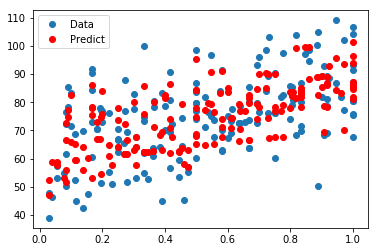

In [237]:
short_pred = mod_short.predict(X)
fig, ax = plt.subplots()
ax.plot(start, y_short, 'o', label="Data")
ax.plot(start, short_pred, 'ro', label='Predict')
ax.legend(loc="best")
plt.show()

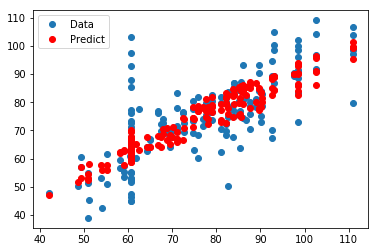

In [241]:
fig, ax = plt.subplots()
ax.plot(reputation, y_short, 'o', label="Data")
ax.plot(reputation, short_pred, 'ro', label="Predict")
ax.legend(loc="best")
plt.show()

In [242]:
# Model: free_score = reputation + start_order
X_free = pd.DataFrame({'Reputation': reputation_free, 'Start Number': start_free}).astype(float)
X_free = sm.add_constant(X_free)
y_free = pd.Series(score_free).astype(float)

In [243]:
mod_free = sm.OLS(y_free, X_free).fit()
print mod_free.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     98.40
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.78e-27
Time:                        00:26:49   Log-Likelihood:                -607.37
No. Observations:                 144   AIC:                             1221.
Df Residuals:                     141   BIC:                             1230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           72.3915      7.850      9.222   

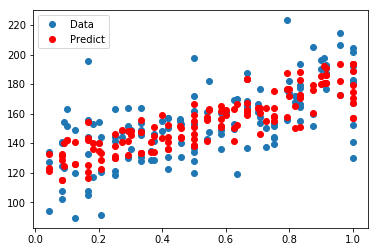

In [244]:
free_pred = mod_free.predict(X_free)
fig, ax = plt.subplots()
ax.plot(start_free, y_free, 'o', label="Data")
ax.plot(start_free, free_pred, 'ro', label='Predict')
ax.legend(loc="best")
plt.show()

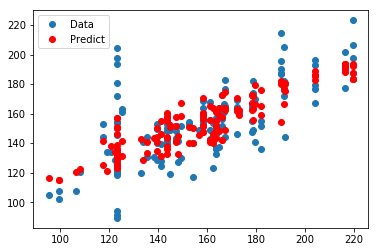

In [245]:
fig, ax = plt.subplots()
ax.plot(reputation_free, y_free, 'o', label="Data")
ax.plot(reputation_free, free_pred, 'ro', label="Predict")
ax.legend(loc="best")
plt.show()

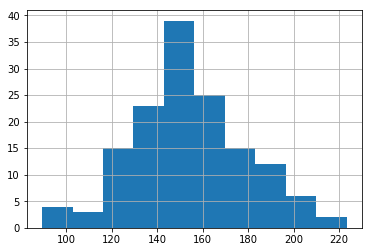

In [205]:
y.hist()
plt.show()

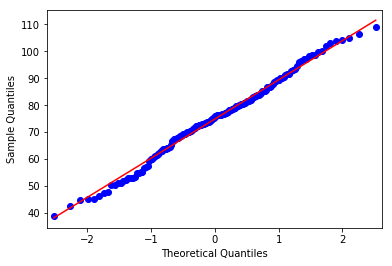

In [213]:
sm.qqplot(y, line='s')

In [214]:
sm.stats.diagnostic.kstest_normal(y)

(0.046735503287374802, 0.44267931617338385)

In [ ]:
# LET'S TRY JUST THE LAST TWO PERFORMANCES.

In [251]:
short_hist = {skater: list(history[history.Name == skater]['Short Score'][-2:])
              for skater in history.Name.get_values()}
free_hist = {skater: list(history_free[history_free.Name == skater]['Free Score'][-2:])
             for skater in history_free.Name.get_values()}
for skater in short_hist:
    while len(short_hist[skater]) < 2:
        short_hist[skater].append(0.)
for skater in free_hist:
    while len(free_hist[skater]) < 2:
        free_hist[skater].append(0.)

In [253]:
prev_short_1 = []
prev_short_2 = []
short_score = []

prev_free_1 = []
prev_free_2 = []
free_score = []

for idx, row in start_order17.iterrows():
    if row.Name in short_hist:
        prev_short_1.append(short_hist[row.Name][0])
        prev_short_2.append(short_hist[row.Name][1])
    else:
        prev_short_1.append(0.)
        prev_short_2.append(0.)
    short_score.append(row.loc['Short Score'])
    
    if pd.notnull(row.loc['Free Start']):
        if row.Name in free_hist:
            prev_free_1.append(free_hist[row.Name][0])
            prev_free_2.append(free_hist[row.Name][1])
        else:
            prev_free_1.append(0.)
            prev_free_2.append(0.)
        free_score.append(row.loc['Free Score'])

In [265]:
# Model: short_score = last short score + short score before that
X_short = pd.DataFrame({'Last Score': prev_short_1, 'Last Last Score': prev_short_2, 'Start': start,
                        'Reputation': reputation}).astype(float)
X_short = sm.add_constant(X_short)
y_short = pd.Series(short_score).astype(float)
mod_short = sm.OLS(y_short, X_short).fit()
print mod_short.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     70.58
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           9.83e-35
Time:                        00:50:15   Log-Likelihood:                -611.76
No. Observations:                 170   AIC:                             1234.
Df Residuals:                     165   BIC:                             1249.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              17.9489      4.396     

In [264]:
# Model: free_score = last free score + free score before that
X_free = pd.DataFrame({'Last Score': prev_free_1, 'Last Last Score': prev_free_2, 'Start': start_free,
                       'Reputation': reputation_free}).astype(float)
X_free = sm.add_constant(X_free)
y_free = pd.Series(free_score).astype(float)
mod_free = sm.OLS(y_free, X_free).fit()
print mod_free.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     50.18
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           4.48e-26
Time:                        00:50:01   Log-Likelihood:                -605.94
No. Observations:                 144   AIC:                             1222.
Df Residuals:                     139   BIC:                             1237.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              65.6361      9.256     